In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
emission_goals = pd.read_csv('clean_data/emission_goals.csv')
emission_goals

,country,2030,2040,2050,1965.0_all_energy,1966.0_all_energy,1967.0_all_energy,1968.0_all_energy,1969.0_all_energy,1970.0_all_energy,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Global,50-125,5-25,<0,155.690938,164.097213,170.274511,180.646875,192.857279,205.007079,...,31085.534841,31973.369818,32273.531532,32795.554106,32804.718691,32787.197673,32936.066036,33279.491334,34007.891035,34169.000782
1,US,30-130,0-32,<0,52.433795,55.383038,57.311776,60.799094,64.049612,66.215508,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
2,EU,75-80,0-5,<0,42.093184,43.282622,44.509488,47.391263,50.927589,54.195380,...,3922.934995,3800.361504,3737.698716,3653.468215,3445.591925,3486.935193,3498.502547,3527.146451,3466.482504,3330.444758
3,Brazil,0-20,<0,<0,0.969469,1.057605,1.095653,1.252840,1.367832,1.585817,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916
4,India,115-155,5,<0,2.217659,2.285377,2.355911,2.517670,2.790898,2.729549,...,1660.654080,1735.150560,1848.132873,1929.353035,2083.540801,2149.379180,2242.892441,2329.816567,2452.501157,2480.354461
5,China,100-110,0-5,<0,5.516043,5.995001,5.391341,5.445350,6.627664,8.486606,...,8143.438769,8824.313535,9001.257445,9244.003274,9239.855878,9185.990809,9137.626592,9297.988543,9507.109644,9825.801775
6,South Africa,45-377,5-10,<0,1.275199,1.283121,1.336141,1.410133,1.451920,1.517304,...,476.665493,467.761278,463.782634,464.160481,469.114585,451.706682,470.509701,465.805487,470.377753,478.823071
7,Indonesia,50-255,5-30,<0,0.303080,0.300495,0.296711,0.316207,0.357009,0.382341,...,428.016230,480.059094,513.002788,532.869390,486.137994,497.934985,501.997264,526.971609,580.719627,632.085380


In [3]:
list(emission_goals.columns)

['country',
 '2030',
 '2040',
 '2050',
 '1965.0_all_energy',
 '1966.0_all_energy',
 '1967.0_all_energy',
 '1968.0_all_energy',
 '1969.0_all_energy',
 '1970.0_all_energy',
 '1971.0_all_energy',
 '1972.0_all_energy',
 '1973.0_all_energy',
 '1974.0_all_energy',
 '1975.0_all_energy',
 '1976.0_all_energy',
 '1977.0_all_energy',
 '1978.0_all_energy',
 '1979.0_all_energy',
 '1980.0_all_energy',
 '1981.0_all_energy',
 '1982.0_all_energy',
 '1983.0_all_energy',
 '1984.0_all_energy',
 '1985.0_all_energy',
 '1986.0_all_energy',
 '1987.0_all_energy',
 '1988.0_all_energy',
 '1989.0_all_energy',
 '1990.0_all_energy',
 '1991.0_all_energy',
 '1992.0_all_energy',
 '1993.0_all_energy',
 '1994.0_all_energy',
 '1995.0_all_energy',
 '1996.0_all_energy',
 '1997.0_all_energy',
 '1998.0_all_energy',
 '1999.0_all_energy',
 '2000.0_all_energy',
 '2001.0_all_energy',
 '2002.0_all_energy',
 '2003.0_all_energy',
 '2004.0_all_energy',
 '2005.0_all_energy',
 '2006.0_all_energy',
 '2007.0_all_energy',
 '2008.0_all_en

In [4]:
selected_df = emission_goals[emission_goals["country"].isin(["Global", "US", "EU", "India", "China"])]

In [5]:
# Pull out data by suffix
all_emission = selected_df.filter(regex='co2_emission$',axis=1).head()
# all_energy.drop_suffix('all_energy')
# Flip the df
all_emissionT = all_emission.T
all_emissionT = all_emissionT.reset_index(drop=False)
all_emissionT = all_emissionT.rename(columns={"index":"year", 99: "oil"})
# Rename columns
allemission_final = all_emissionT.rename(columns={0:'Global', 1:'US', 2:'EU', 4 :'India', 5:'China'})
allemission_final

,year,Global,US,EU,India,China
0,1965.0_co2_emission,11207.741166,3480.084706,3304.482212,167.452221,488.525419
1,1966.0_co2_emission,11725.313885,3675.466374,3344.123377,170.025915,530.349045
2,1967.0_co2_emission,12084.725642,3772.622833,3412.149716,174.471595,475.920674
3,1968.0_co2_emission,12743.051213,3994.225972,3613.583730,182.542312,476.682790
4,1969.0_co2_emission,13530.939823,4170.119294,3855.707414,197.478016,582.473700
5,1970.0_co2_emission,14312.868023,4298.208775,4056.978118,189.897311,748.507130
6,1971.0_co2_emission,14788.378466,4340.724935,4106.837161,206.588652,881.701156
7,1972.0_co2_emission,15495.494674,4564.699478,4244.459029,218.567267,945.376724
8,1973.0_co2_emission,16345.050954,4764.400900,4459.940511,219.012843,987.002301
9,1974.0_co2_emission,16255.751893,4596.370255,4335.739307,238.596797,1006.768535


In [6]:
col = allemission_final['year'] 

col_split1 =[x.split('.') for x in col]
split_df1 = pd.DataFrame(col_split1)
# us_df_new[['years','extra']] = us_df_new[[x.split('.') for x in (us_df_new['year'])]]
split_df1

,0,1
0,1965,0_co2_emission
1,1966,0_co2_emission
2,1967,0_co2_emission
3,1968,0_co2_emission
4,1969,0_co2_emission
5,1970,0_co2_emission
6,1971,0_co2_emission
7,1972,0_co2_emission
8,1973,0_co2_emission
9,1974,0_co2_emission


In [7]:
split_df1.iloc[:,0]

0     1965
1     1966
2     1967
3     1968
4     1969
5     1970
6     1971
7     1972
8     1973
9     1974
10    1975
11    1976
12    1977
13    1978
14    1979
15    1980
16    1981
17    1982
18    1983
19    1984
20    1985
21    1986
22    1987
23    1988
24    1989
25    1990
26    1991
27    1992
28    1993
29    1994
30    1995
31    1996
32    1997
33    1998
34    1999
35    2000
36    2001
37    2002
38    2003
39    2004
40    2005
41    2006
42    2007
43    2008
44    2009
45    2010
46    2011
47    2012
48    2013
49    2014
50    2015
51    2016
52    2017
53    2018
54    2019
Name: 0, dtype: object

In [8]:
allemission_final[['year']]=split_df1.iloc[:,0]
allemission_final

,year,Global,US,EU,India,China
0,1965,11207.741166,3480.084706,3304.482212,167.452221,488.525419
1,1966,11725.313885,3675.466374,3344.123377,170.025915,530.349045
2,1967,12084.725642,3772.622833,3412.149716,174.471595,475.920674
3,1968,12743.051213,3994.225972,3613.583730,182.542312,476.682790
4,1969,13530.939823,4170.119294,3855.707414,197.478016,582.473700
5,1970,14312.868023,4298.208775,4056.978118,189.897311,748.507130
6,1971,14788.378466,4340.724935,4106.837161,206.588652,881.701156
7,1972,15495.494674,4564.699478,4244.459029,218.567267,945.376724
8,1973,16345.050954,4764.400900,4459.940511,219.012843,987.002301
9,1974,16255.751893,4596.370255,4335.739307,238.596797,1006.768535


In [9]:
# # reset index to the year column
# allemission_final.set_index('year', inplace=True)

### Import the cleaned all energy file

In [10]:
# Import the prediction data
allenergy_combined = pd.read_csv('graph_data/allenergy_combine_adjust.csv')
allenergy_combined

,year,Global,US,EU,India,China
0,1965,155.690938,52.433795,42.093184,2.217659,5.516043
1,1966,164.097213,55.383038,43.282622,2.285377,5.995001
2,1967,170.274511,57.311776,44.509488,2.355911,5.391341
3,1968,180.646875,60.799094,47.391263,2.517670,5.445350
4,1969,192.857279,64.049612,50.927589,2.790898,6.627664
5,1970,205.007079,66.215508,54.195380,2.729549,8.486606
6,1971,213.357154,67.591944,55.464640,2.838043,10.061689
7,1972,224.932635,71.064330,58.120014,2.987987,10.846553
8,1973,237.883880,73.984875,61.375230,3.049283,11.449056
9,1974,239.162833,72.120946,60.366645,3.232547,11.805455


### Predict emissions based on these countries/region

In [11]:
allenergy_combined_select = allenergy_combined.iloc[:55]
allenergy_combined_select 

,year,Global,US,EU,India,China
0,1965,155.690938,52.433795,42.093184,2.217659,5.516043
1,1966,164.097213,55.383038,43.282622,2.285377,5.995001
2,1967,170.274511,57.311776,44.509488,2.355911,5.391341
3,1968,180.646875,60.799094,47.391263,2.517670,5.445350
4,1969,192.857279,64.049612,50.927589,2.790898,6.627664
5,1970,205.007079,66.215508,54.195380,2.729549,8.486606
6,1971,213.357154,67.591944,55.464640,2.838043,10.061689
7,1972,224.932635,71.064330,58.120014,2.987987,10.846553
8,1973,237.883880,73.984875,61.375230,3.049283,11.449056
9,1974,239.162833,72.120946,60.366645,3.232547,11.805455


In [12]:
allenergy_combined_pred = allenergy_combined[allenergy_combined["year"]>2019] 
allenergy_combined_pred

,year,Global,US,EU,India,China
55,2020,568.705470,93.694689,66.682708,34.844686,152.765389
56,2030,643.046374,84.153539,60.078761,46.789905,205.703530
57,2040,717.387278,74.612390,53.474815,58.735124,258.641670
58,2050,791.728182,65.071240,46.870869,70.680343,311.579810


### Global

In [13]:
# Assign X (data) and y (target)
X = allenergy_combined_select[["Global"]]
y = allemission_final["Global"].values.reshape(-1, 1)
print(X.shape, y.shape)

(55, 1) (55, 1)


In [14]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [16]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

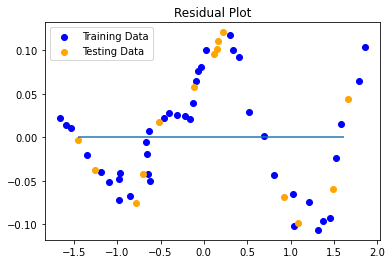

In [17]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [18]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.005606202482004978, R2: 0.993561141258827


In [19]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.005677674002634537, R2: 0.9934790544938863


In [20]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0056058679715993345, R2: 0.9935615254520944


In [21]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.005676737546444833, R2: 0.9934801300364022


In [22]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.005606,0.993561
1,Lasso,0.005678,0.993479
2,Ridge,0.005606,0.993562
3,ElasticNet,0.005677,0.993480


In [23]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
2,Ridge,0.005606,0.993562


In [24]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
2,Ridge,0.005606,0.993562


### Ridge Model gives the smallest MSE score and highest R2 score
We will use the linear regression model for prediction

In [25]:
# allenergy_combined

In [26]:
# Assign X (data) and y (target)
global_X = allenergy_combined_pred[['Global']]

In [27]:
# Create a StandardScaler model for the new_X

global_X_scaled = X_scaler.transform(global_X)

In [28]:
# Prediction
global_predictions = ridge.predict(global_X_scaled)

In [29]:
year_ls = list(allenergy_combined_pred['year'])
year_ls 

[2020, 2030, 2040, 2050]

In [30]:
y_inverse = y_scaler.inverse_transform(global_predictions)

allenergy_prediction_df = pd.DataFrame(y_inverse, columns=["Global"])
allenergy_prediction_df.insert(0, "year", year_ls)
allenergy_prediction_df

,year,Global
0,2020,34025.761902
1,2030,38105.970799
2,2040,42186.179697
3,2050,46266.388594


### US

In [31]:
# Assign X (data) and y (target)
X = allenergy_combined_select[["US"]]
y = allemission_final["US"].values.reshape(-1, 1)
print(X.shape, y.shape)

(55, 1) (55, 1)


In [32]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [34]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [35]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.09075391147091942, R2: 0.8899532338498576


In [36]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.09104072528314504, R2: 0.8896054479306498


In [37]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 0.09075855059816765, R2: 0.8899476085170962


In [38]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.09102911501621407, R2: 0.8896195263577851


In [39]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.090754,0.889953
1,Lasso,0.091041,0.889605
2,Ridge,0.090759,0.889948
3,ElasticNet,0.091029,0.889620


In [40]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
0,LinearRegression,0.090754,0.889953


In [41]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
0,LinearRegression,0.090754,0.889953


### Linear Regression Model gives the smallest MSE score and highest R2 score

In [42]:
# Assign X (data) and y (target)
us_X = allenergy_combined_pred[['US']]

# Create a StandardScaler model for the new_X
us_X_scaled = X_scaler.transform(us_X)

# Prediction
us_predictions = model.predict(us_X_scaled)

y_inverse = y_scaler.inverse_transform(us_predictions)

us_prediction_df = pd.DataFrame(y_inverse, columns=["US"])
us_prediction_df.insert(0, "year", year_ls)
us_prediction_df

,year,US
0,2020,5499.056707
1,2030,5075.992336
2,2040,4652.927964
3,2050,4229.863592


### EU

In [43]:
# Assign X (data) and y (target)
X = allenergy_combined_select[["EU"]]
y = allemission_final["EU"].values.reshape(-1, 1)
print(X.shape, y.shape)

(55, 1) (55, 1)


In [44]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [46]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [47]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.6804670118011772, R2: 0.07577322035529332


In [48]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.6787979320439962, R2: 0.07804020491471575


In [49]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 0.6804510093654949, R2: 0.07579495525109381


In [50]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.6793072915616178, R2: 0.07734838047872039


In [51]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.680467,0.075773
1,Lasso,0.678798,0.078040
2,Ridge,0.680451,0.075795
3,ElasticNet,0.679307,0.077348


In [52]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
1,Lasso,0.678798,0.07804


In [53]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
1,Lasso,0.678798,0.07804


### All models aren't going to give good predictions

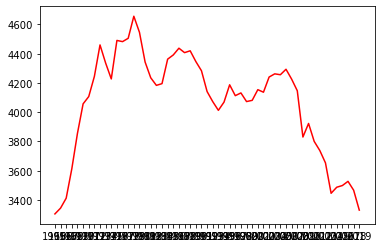

In [54]:
plt.plot(allemission_final.year, allemission_final.EU, 'red')

In [55]:
allemission_final_select = allemission_final[allemission_final["year"]>'2009']
allemission_final_select

,year,Global,US,EU,India,China
45,2010,31085.534841,5485.715925,3922.934995,1660.654080,8143.438769
46,2011,31973.369818,5336.435925,3800.361504,1735.150560,8824.313535
47,2012,32273.531532,5089.974540,3737.698716,1848.132873,9001.257445
48,2013,32795.554106,5249.595898,3653.468215,1929.353035,9244.003274
49,2014,32804.718691,5254.565096,3445.591925,2083.540801,9239.855878
50,2015,32787.197673,5141.406746,3486.935193,2149.379180,9185.990809
51,2016,32936.066036,5042.431426,3498.502547,2242.892441,9137.626592
52,2017,33279.491334,4983.869718,3527.146451,2329.816567,9297.988543
53,2018,34007.891035,5116.785715,3466.482504,2452.501157,9507.109644
54,2019,34169.000782,4964.693088,3330.444758,2480.354461,9825.801775


In [56]:
allenergy_combined_select_2 = allenergy_combined_select[allenergy_combined_select['year']>2009]
allenergy_combined_select_2

,year,Global,US,EU,India,China
45,2010,506.024137,92.972589,74.152190,22.554708,104.284002
46,2011,518.310827,92.088362,71.688762,23.880450,112.540808
47,2012,524.981692,89.687765,71.043914,25.113414,117.045350
48,2013,534.907946,92.095480,70.449605,26.076945,121.374657
49,2014,539.249792,93.054168,67.712970,27.861675,124.197933
50,2015,543.174900,92.149004,68.517875,28.770819,125.376891
51,2016,550.601336,92.017799,69.136028,30.067429,126.950737
52,2017,560.421575,92.330525,69.910232,31.334551,130.831734
53,2018,576.228810,95.602919,69.806435,33.301794,135.770697
54,2019,583.898977,94.648804,68.806269,34.059514,141.699218


In [57]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = allenergy_combined_select_2.EU.values.reshape(-1, 1)
y = allemission_final_select.EU.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (10, 1) (10, 1)


In [58]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [59]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Min X Value: [[67.7129704]]
Max X Value: [[74.15218968]]


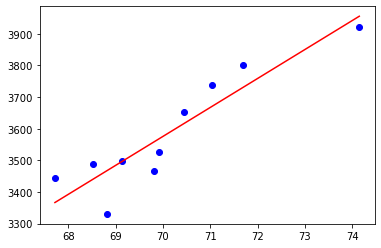

In [60]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [61]:
# Predictions
predict_X = list(allenergy_combined_pred['EU'])
# Predictions
predict_2020 = model.predict([[predict_X[0]]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[predict_X[1]]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[predict_X[2]]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[predict_X[3]]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [62]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":year_ls ,
           "EU": predict_values}
data_years

{'year': [2020, 2030, 2040, 2050],
 'EU': [3272.204469995787,
  2667.909210669537,
  2063.6139513432663,
  1459.3186920170174]}

In [63]:
eu_predict_df = pd.DataFrame(data_years, columns=["year", 'EU'])
eu_predict_df

,year,EU
0,2020,3272.204470
1,2030,2667.909211
2,2040,2063.613951
3,2050,1459.318692


### India

In [64]:
# Assign X (data) and y (target)
X = allenergy_combined_select[["India"]]
y = allemission_final["India"].values.reshape(-1, 1)
print(X.shape, y.shape)

(55, 1) (55, 1)


In [65]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [67]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [68]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0004406762789170281, R2: 0.9995045129123453


In [69]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0007384884064071672, R2: 0.99916965925496


In [70]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0004458666465517394, R2: 0.9994986769727539


In [71]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0007365439726334727, R2: 0.9991718455351701


In [72]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.000441,0.999505
1,Lasso,0.000738,0.999170
2,Ridge,0.000446,0.999499
3,ElasticNet,0.000737,0.999172


In [73]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
0,LinearRegression,0.000441,0.999505


In [74]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
0,LinearRegression,0.000441,0.999505


### Linear Regression Model gives the smallest MSE score and highest R2 score

In [75]:
# Assign X (data) and y (target)
india_X = allenergy_combined_pred[['India']]

# Create a StandardScaler model for the new_X
india_X_scaled = X_scaler.transform(india_X)

# Prediction
india_predictions = model.predict(india_X_scaled)

y_inverse = y_scaler.inverse_transform(india_predictions)

india_prediction_df = pd.DataFrame(y_inverse, columns=["India"])
india_prediction_df.insert(0, "year", year_ls)
india_prediction_df

,year,India
0,2020,2563.716952
1,2030,3445.196155
2,2040,4326.675358
3,2050,5208.154562


### China

In [76]:
# Assign X (data) and y (target)
X = allenergy_combined_select[["China"]]
y = allemission_final["China"].values.reshape(-1, 1)
print(X.shape, y.shape)

(55, 1) (55, 1)


In [77]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [79]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [80]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.004042121647666296, R2: 0.9954296055418153


In [81]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.004098048007813631, R2: 0.9953663700559087


In [82]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 0.00404137299327373, R2: 0.9954304520393196


In [83]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.004097142002181195, R2: 0.9953673944691952


In [84]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.004042,0.995430
1,Lasso,0.004098,0.995366
2,Ridge,0.004041,0.995430
3,ElasticNet,0.004097,0.995367


In [85]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
2,Ridge,0.004041,0.99543


In [86]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
2,Ridge,0.004041,0.99543


### Ridge Model gives the smallest MSE score and highest R2 score

In [87]:
# Assign X (data) and y (target)
china_X = allenergy_combined_pred[['China']]

# Create a StandardScaler model for the new_X
china_X_scaled = X_scaler.transform(china_X)

# Prediction
china_predictions = ridge.predict(china_X_scaled)

y_inverse = y_scaler.inverse_transform(china_predictions)

china_prediction_df = pd.DataFrame(y_inverse, columns=["China"])
china_prediction_df.insert(0, "year", year_ls)
china_prediction_df

,year,China
0,2020,11365.147576
1,2030,15223.617875
2,2040,19082.088173
3,2050,22940.558472


## Add predictions to past emissions data

In [88]:
# allenergy_prediction_df, us_prediction_df, eu_predict_df, india_prediction_df, china_prediction_df

In [89]:
from functools import reduce
data_frames = [allenergy_prediction_df, us_prediction_df, eu_predict_df, india_prediction_df, china_prediction_df]
allenergy_combined = reduce(lambda  left,right: pd.merge(left,right,on=['year'],
                                            how='outer'), data_frames)
allenergy_combined.set_index('year', inplace=True)
allenergy_combined

,Global,US,EU,India,China
year,,,,,
2020,34025.761902,5499.056707,3272.204470,2563.716952,11365.147576
2030,38105.970799,5075.992336,2667.909211,3445.196155,15223.617875
2040,42186.179697,4652.927964,2063.613951,4326.675358,19082.088173
2050,46266.388594,4229.863592,1459.318692,5208.154562,22940.558472


In [90]:
allemission_final.set_index("year", inplace=True)

In [91]:
allemission_final_combine = allemission_final.append(allenergy_combined)
allemission_final_combine

,Global,US,EU,India,China
year,,,,,
1965,11207.741166,3480.084706,3304.482212,167.452221,488.525419
1966,11725.313885,3675.466374,3344.123377,170.025915,530.349045
1967,12084.725642,3772.622833,3412.149716,174.471595,475.920674
1968,12743.051213,3994.225972,3613.583730,182.542312,476.682790
1969,13530.939823,4170.119294,3855.707414,197.478016,582.473700
1970,14312.868023,4298.208775,4056.978118,189.897311,748.507130
1971,14788.378466,4340.724935,4106.837161,206.588652,881.701156
1972,15495.494674,4564.699478,4244.459029,218.567267,945.376724
1973,16345.050954,4764.400900,4459.940511,219.012843,987.002301


## Create one where the emissions are benchmarks

In [92]:
# Read the csv file into a pandas DataFrame
emission_benchmarks = pd.read_csv('clean_data/emission_benchmarks.csv')
emission_benchmarks

,country,2030,2040,2050
0,Global,50-125,5-25,<0
1,US,30-130,0-32,<0
2,EU,75-80,0-5,<0
3,Brazil,0-20,<0,<0
4,India,115-155,5,<0
5,China,100-110,0-5,<0
6,South Africa,45-377,5-10,<0
7,Indonesia,50-255,5-30,<0


In [93]:
emission_benchmarksT = emission_benchmarks.T
emission_benchmarksT = emission_benchmarksT.rename(columns=emission_benchmarksT.iloc[0])
emission_benchmarksT

,Global,US,EU,Brazil,India,China,South Africa,Indonesia
country,Global,US,EU,Brazil,India,China,South Africa,Indonesia
2030,50-125,30-130,75-80,0-20,115-155,100-110,45-377,50-255
2040,5-25,0-32,0-5,<0,5,0-5,5-10,5-30
2050,<0,<0,<0,<0,<0,<0,<0,<0


In [94]:
emission_benchmarksT.drop(["country"], inplace=True)

In [95]:
emission_benchmarksT

,Global,US,EU,Brazil,India,China,South Africa,Indonesia
2030,50-125,30-130,75-80,0-20,115-155,100-110,45-377,50-255
2040,5-25,0-32,0-5,<0,5,0-5,5-10,5-30
2050,<0,<0,<0,<0,<0,<0,<0,<0


In [96]:
# 2015 Paris Pledge emission reductions
# China: baseline 2005 (6098.180083), -60-65% for 2030; emission peak before 2030
# EU: baseline 1990 (4346.469202), -40% for 2030; baseline 2010 (3922.934995), -80-90% for 2050
# Global: baseline 2010 (31085.534841), -40-70% for 2050
# US: baseline 2005 (5873.133156), -26-28%
# India: baseline 2005 (1203.631545), -33-35% for 2030

In [100]:
china_2030 = 6098.180083-(6098.180083*((.65+.60)/2))
china_2040 = china_2030/2
EU_2030 = 4346.469202-(4346.469202*.4)
EU_2050 = 3922.934995-(3922.934995*((.80+.90)/2))
global_2030 = 31085.534841-(31085.534841*((.40+.70)/2))
global_2040 = global_2030/2
us_2025 = 5873.133156-(5873.133156*((.26+.28)/2))
us_2040 = us_2025/2
india_2030 = 1203.631545-(1203.631545*((.33+.35)/2))
india_2050 = india_2030/2 

In [101]:
emission_pledges = {"year": [2030, 2040, 2050],
                "Global":[global_2030, global_2040, 0],
                "US": [us_2025,  us_2040, 0],
                "EU": [(75+80)/2, (5)/2, 0],
                "India": [india_2030, india_2050, 0],
                "China": [china_2030, china_2040, 0]}
emission_pledges_df = pd.DataFrame(emission_pledges)
emission_pledges_df.set_index('year', inplace=True)

In [102]:
emission_pledges_df

,Global,US,EU,India,China
year,,,,,
2030,13988.490678,4287.387204,77.5,794.39682,2286.817531
2040,6994.245339,2143.693602,2.5,397.19841,1143.408766
2050,0.000000,0.000000,0.0,0.00000,0.000000


In [108]:
# country_name = ["Global", "US", "EU", "India", "China"]
# benchmarks_2030 = [(125+50)/2, (130+80)/2, (75+80)/2, (115+155)/2, (100+110)/2]
# benchmarks_2040 = [(5+25)/2, (32)/2, (5)/2, (5)/2, (5)/2]
# benchmarks_2050 = [0, 0, 0, 0, 0]
bencharks_all = {"year": [2030, 2040, 2050],
                "Global":[(125+50)/2, (5+25)/2, 0],
                "US": [(130+80)/2,  (32)/2, 0],
                "EU": [(75+80)/2, (5)/2, 0],
                "India": [(115+155)/2, (5)/2, 0],
                "China": [(100+110)/2, (5)/2, 0]}
bencharks_all_df = pd.DataFrame(bencharks_all)
bencharks_all_df.set_index('year', inplace=True)

In [109]:
bencharks_all_df

,Global,US,EU,India,China
year,,,,,
2030,87.5,105.0,77.5,135.0,105.0
2040,15.0,16.0,2.5,2.5,2.5
2050,0.0,0.0,0.0,0.0,0.0


In [103]:
benchmarks_combine = allemission_final.append(emission_pledges_df)
benchmarks_combine

,Global,US,EU,India,China
year,,,,,
1965,11207.741166,3480.084706,3304.482212,167.452221,488.525419
1966,11725.313885,3675.466374,3344.123377,170.025915,530.349045
1967,12084.725642,3772.622833,3412.149716,174.471595,475.920674
1968,12743.051213,3994.225972,3613.583730,182.542312,476.682790
1969,13530.939823,4170.119294,3855.707414,197.478016,582.473700
1970,14312.868023,4298.208775,4056.978118,189.897311,748.507130
1971,14788.378466,4340.724935,4106.837161,206.588652,881.701156
1972,15495.494674,4564.699478,4244.459029,218.567267,945.376724
1973,16345.050954,4764.400900,4459.940511,219.012843,987.002301


## Export Files

In [104]:
# Export the predictions
allemission_final_combine.to_csv('graph_data/allenergy_emission_predictions.csv', encoding='utf-8')
benchmarks_combine.to_csv('graph_data/allenergy_emission_benchmarks.csv', encoding='utf-8')